<a href="https://colab.research.google.com/github/natbutter/geohack/blob/master/geohack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyshp pandas numpy scipy sklearn matplotlib

  Using cached https://files.pythonhosted.org/packages/ca/1f/e9cc2c3fce32e2926581f8b6905831165235464c858ba550b6e9b8ef78c3/pyshp-2.1.2.tar.gz
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=2bc9d2313e4a10aa2ea5b70f1501a5b14433998de1f2fccd36c3e355727eecef
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp


In [4]:
!apt-get -qq install python-cartopy python3-cartopy;

In [5]:
import pandas #For dealing with data structures
import numpy as np #Data array manipulation
import scipy #Scientific Python, has lots of useful tools
import scipy.io #A specific sub-module for input/output of sci data

#scikit-learn tools to perform machine learning classification
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

#For making pretty figures
import matplotlib.pyplot as plt 

#For easy geographic projections on a map
import cartopy.crs as ccrs

In [8]:
giturl="https://raw.githubusercontent.com/natbutter/geohack/master/data/ml_data_points.csv"
ml_data=pandas.read_csv(giturl,index_col=0)

In [9]:
ml_data

,0 Present day longitude (degrees),1 Present day latitude (degrees),2 Reconstructed longitude (degrees),3 Reconstructed latitude (degrees),4 Age (Ma),5 Time before mineralisation (Myr),6 Seafloor age (Myr),7 Segment length (km),8 Slab length (km),9 Distance to trench edge (km),10 Subducting plate normal velocity (km/Myr),11 Subducting plate parallel velocity (km/Myr),12 Overriding plate normal velocity (km/Myr),13 Overriding plate parallel velocity (km/Myr),14 Convergence normal rate (km/Myr),15 Convergence parallel rate (km/Myr),16 Subduction polarity (degrees),17 Subduction obliquity (degrees),18 Distance along margin (km),19 Subduction obliquity signed (radians),20 Ore Deposits Binary Flag (1 or 0)
0,-66.28,-27.37,-65.264812,-28.103781,6.0,0.0,48.189707,56.08069,2436.30907,2436.30907,85.16858,40.63020,-17.43987,12.20271,102.31471,28.82518,5.67505,15.73415,2269.19769,0.274613,1.0
1,-69.75,-30.50,-67.696759,-31.970639,12.0,0.0,52.321162,56.09672,2490.68735,2490.68735,93.21685,39.60199,-22.80622,13.40127,115.35820,27.39401,5.78937,13.35854,1823.34107,0.233151,1.0
2,-66.65,-27.27,-65.128689,-28.374772,9.0,0.0,53.506085,55.77705,2823.54951,2823.54951,82.65247,45.32425,-18.08485,11.27500,100.24282,34.62444,8.97218,19.05520,2269.19769,0.332576,1.0
3,-66.61,-27.33,-65.257928,-28.311094,8.0,0.0,51.317135,55.90088,2656.71724,2656.71724,83.85484,43.13319,-17.78538,11.72618,101.21965,31.92962,7.42992,17.50782,2269.19769,0.305569,1.0
4,-66.55,-27.40,-65.366917,-28.257580,7.0,0.0,49.340097,56.09011,2547.29585,2547.29585,85.16731,40.57322,-17.43622,12.23778,102.25748,28.80235,5.65657,15.73067,2269.19769,0.274552,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-78.67,-6.73,-70.657487,-11.057387,39.0,0.0,62.727249,56.14919,5373.67650,1076.30110,46.13641,13.21524,-25.08597,12.24246,60.45651,-7.46828,-22.30925,7.04216,4708.08568,-0.122909,0.0
297,-75.09,-13.69,-37.112536,-19.124363,121.0,0.0,30.740063,54.09642,269.79929,269.79929,-8.81852,-39.68330,11.56758,7.99788,-19.41449,-59.05957,-46.36908,71.80290,3761.82099,1.253197,0.0
298,-71.31,-14.91,-38.398992,-21.934657,151.0,0.0,17.739843,53.93117,323.86191,323.86191,48.04991,-3.42257,-17.25992,-22.78837,8.88338,-7.68381,-40.99490,40.85864,3378.69739,-0.713118,0.0
299,-70.61,-17.25,-37.243172,-24.160112,145.0,0.0,11.744395,53.94534,163.59542,163.59542,49.62662,-2.26253,14.87833,0.05195,2.36178,-23.78566,-38.97366,84.32944,3160.06366,-1.471826,0.0


In [14]:
ml_data_np=ml_data.values
ml_data_np

array([[-6.62800000e+01, -2.73700000e+01, -6.52648116e+01, ...,
         2.26919769e+03,  2.74612724e-01,  1.00000000e+00],
       [-6.97500000e+01, -3.05000000e+01, -6.76967590e+01, ...,
         1.82334107e+03,  2.33150567e-01,  1.00000000e+00],
       [-6.66500000e+01, -2.72700000e+01, -6.51286894e+01, ...,
         2.26919769e+03,  3.32576041e-01,  1.00000000e+00],
       ...,
       [-7.13100000e+01, -1.49100000e+01, -3.83989923e+01, ...,
         3.37869739e+03, -7.13117937e-01,  0.00000000e+00],
       [-7.06100000e+01, -1.72500000e+01, -3.72431721e+01, ...,
         3.16006366e+03, -1.47182646e+00,  0.00000000e+00],
       [-7.61300000e+01, -1.16000000e+01, -4.39939144e+01, ...,
         4.09390633e+03, -3.90912166e-01,  0.00000000e+00]])

In [15]:
params=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
params

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [16]:
datalength=len(params)
datalength

21

In [17]:
ml_data_norm=preprocessing.scale(ml_data_np[:,params])

In [20]:
features=ml_data_norm
features

array([[ 1.31810748, -0.87116294, -0.67409163, ..., -0.76770709,
         0.28585995,  1.02353263],
       [ 0.50052218, -1.1685152 , -0.84507651, ..., -1.11246965,
         0.22528664,  1.02353263],
       [ 1.2309298 , -0.86166286, -0.66452118, ..., -0.76770709,
         0.37054031,  1.02353263],
       ...,
       [ 0.13296221,  0.31254606,  1.21478506, ...,  0.09022334,
        -1.15714545, -0.97700842],
       [ 0.29789296,  0.09024437,  1.29604823, ..., -0.07883712,
        -2.26556552, -0.97700842],
       [-1.00270384,  0.62699845,  0.82141839, ...,  0.64326496,
        -0.68642536, -0.97700842]])

In [21]:
targets=ml_data_np[:,20]
targets

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
print("Shape of ML data array: ", ml_data_norm.shape)
print("Positive (deposits) examples: ",np.shape(ml_data_np[ml_data_np[:,20]==1,:]))
print("Negative (non-deposits) examples: ",np.shape(ml_data_np[ml_data_np[:,20]==0,:]))

Shape of ML data array:  (301, 21)
Positive (deposits) examples:  (147, 21)
Negative (non-deposits) examples:  (154, 21)


In [23]:
print('Make the classifiers')

print('Random Forest...')
#create and train the random forest
#multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
#n_estimators use between 64-128 doi: 10.1007/978-3-642-31537-4_13
rf = RandomForestClassifier(n_estimators=128, n_jobs=1,class_weight=None)
rf.fit(features,targets)
print("Done RF")

scores = cross_val_score(rf, features,targets, cv=10)
print("RF Scores: ",scores)
print("SCORE Mean: %.2f" % np.mean(scores), "STD: %.2f" % np.std(scores), "\n")

print("Targets (expected result):")
print(targets)

print("Prediction (actual result):")
print(rf.predict(features))

Make the classifiers
Random Forest...
Done RF
RF Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
SCORE Mean: 1.00 STD: 0.00 

Targets (expected result):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

Importance 	 Feature
0.013 		 0 Present day longitude (degrees)
0.009 		 1 Present day latitude (degrees)
0.050 		 2 Reconstructed longitude (degrees)
0.015 		 3 Reconstructed latitude (degrees)
0.047 		 4 Age (Ma)
0.000 		 5 Time before mineralisation (Myr)
0.036 		 6 Seafloor age (Myr)
0.018 		 7 Segment length (km)
0.020 		 8 Slab length (km)
0.033 		 9 Distance to trench edge (km)
0.021 		 10 Subducting plate normal velocity (km/Myr)
0.018 		 11 Subducting plate parallel velocity (km/Myr)
0.021 		 12 Overriding plate normal velocity (km/Myr)
0.017 		 13 Overriding plate parallel velocity (km/Myr)
0.023 		 14 Convergence normal rate (km/Myr)
0.010 		 15 Convergence parallel rate (km/Myr)
0.011 		 16 Subduction polarity (degrees)
0.025 		 17 Subduction obliquity (degrees)
0.007 		 18 Distance along margin (km)
0.010 		 19 Subduction obliquity signed (radians)
0.596 		 20 Ore Deposits Binary Flag (1 or 0)


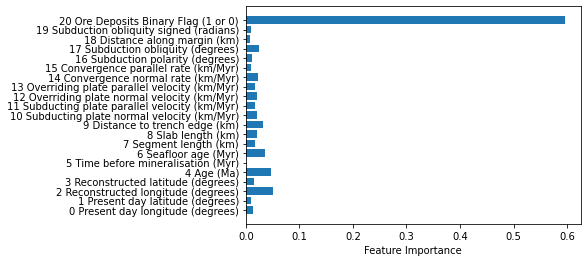

In [31]:
#Make a list of labels for our chosen features
paramColumns=np.array(ml_data.columns)
paramLabels=paramColumns[params].tolist()

#Create a new figure
fig, ax = plt.subplots()

#Plot the bar graph
rects=ax.barh(np.arange(0, datalength, step=1),rf.feature_importances_)

#Label the axes
ax.set_yticks(np.arange(0, datalength, step=1))
ax.set_yticklabels(paramLabels,rotation=0)
ax.set_xlabel('Feature Importance')

#Print the feature importance to compare with plot
np.set_printoptions(precision=3,suppress=True)
print("Importance \t Feature")
for i,label in enumerate(paramLabels):
    print("%1.3f \t\t %s" % (rf.feature_importances_[i],label))

plt.show()

In [25]:
#Apply the trained ML to our gridded data to determine the probabilities at each of the points
print('RF...')
pRF=np.array(rf.predict_proba(features))
print("Done RF")

RF...
Done RF


In [28]:
filename="https://github.com/natbutter/geohack/blob/master/data/EarthByte_Zahirovic_etal_2016_ESR_r888_AgeGrid-0.nc"
data = scipy.io.netcdf.netcdf_file(filename,'r')
data.variables

FileNotFoundError: ignored

In [29]:
from google.colab import files
uploaded = files.upload()

Saving EarthByte_Zahirovic_etal_2016_ESR_r888_AgeGrid-0.nc to EarthByte_Zahirovic_etal_2016_ESR_r888_AgeGrid-0.nc


In [30]:
import io
datain=io.BytesIO(uploaded['EarthByte_Zahirovic_etal_2016_ESR_r888_AgeGrid-0.nc'])
data = scipy.io.netcdf.netcdf_file(datain,'r')
#df2 = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))

In [32]:
data.variables

OrderedDict([('lon', <scipy.io.netcdf.netcdf_variable at 0x7fc281121630>),
             ('lat', <scipy.io.netcdf.netcdf_variable at 0x7fc2811212e8>),
             ('z', <scipy.io.netcdf.netcdf_variable at 0x7fc281121cc0>)])

In [33]:
varX=data.variables['lon'][:]
varY=data.variables['lat'][:]
varZ=np.array(data.variables['z'][:])
data.close()

In [35]:
from matplotlib import cm

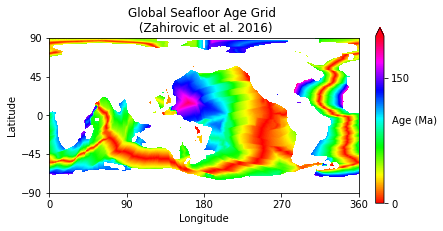

In [36]:
#Make a figure object
plt.figure()

#Get the axes of the current figure, for manipulation
ax = plt.gca()

#Create a colormap from a predefined function
#age_cmap=colormap_age()

#Put down the main dataset
im=ax.imshow(varZ,vmin=0,vmax=200,extent=[0,360,-90,90],origin='lower',aspect=1,cmap=cm.hsv)

#Make a colorbar
cbar=plt.colorbar(im,fraction=0.025,pad=0.05,ticks=[0, 150],extend='max')
cbar.set_label('Age (Ma)', rotation=0)

#Clean up the default axis ticks
plt.yticks([-90,-45,0,45,90])
plt.xticks([0,90,180,270,360])

#Put labels on the figure
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#Put a title on it
plt.title("Global Seafloor Age Grid \n (Zahirovic et al. 2016)")

plt.show()

In [1]:
time=145

In [2]:
print("The age of the sample is", time, " Million years")

The age of the sample is 145  Million years


In [3]:
print("My sample is ", 201, " Million years old from the", 'Jurassic', " age.")

My sample is  201  Million years old from the Jurassic  age.


In [5]:
times=[1,4.5,5+3.2,'Jurassic',"Another string",True]

In [6]:
print(times)

[1, 4.5, 8.2, 'Jurassic', 'Another string', True]


In [7]:
for myindex, mything in enumerate(times):
    print("index:",myindex," The thing in my 'times' list:",mything)

index: 0  The thing in my 'times' list: 1
index: 1  The thing in my 'times' list: 4.5
index: 2  The thing in my 'times' list: 8.2
index: 3  The thing in my 'times' list: Jurassic
index: 4  The thing in my 'times' list: Another string
index: 5  The thing in my 'times' list: True


In [8]:
age=140
# What is the value of "time" ?
# age < time is a "logical" data-type. It's either True or False
while age < time:
    print("time:", time, " age:", age, " difference:",time-age)
    age=age+1

time: 145  age: 140  difference: 5
time: 145  age: 141  difference: 4
time: 145  age: 142  difference: 3
time: 145  age: 143  difference: 2
time: 145  age: 144  difference: 1


In [7]:
from google.colab import files
uploaded = files.upload()

Saving EarthChemCU.txt to EarthChemCU (1).txt


In [8]:
import io
datain=io.BytesIO(uploaded['EarthChemCU.txt'])

In [9]:
chemdata=np.loadtxt(datain, delimiter=',')

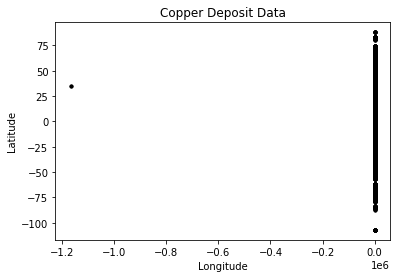

In [17]:
plt.plot(chemdata[:,1],chemdata[:,0],'k.')
plt.title('Copper Deposit Data')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

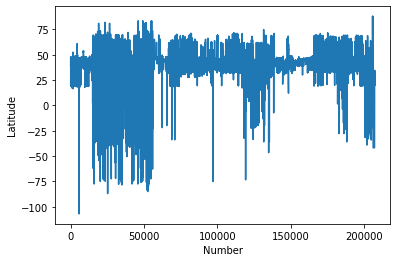

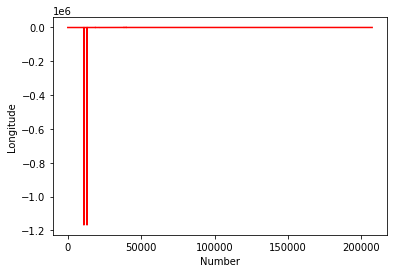

In [10]:
#Plot the Latitudes
plt.plot(chemdata[:,0])
plt.ylabel('Latitude')
plt.xlabel('Number')
plt.show()

#Plot the Longitudes
plt.plot(chemdata[:,1],'r')
plt.ylabel('Longitude')
plt.xlabel('Number')
plt.show()

In [11]:
where_longitude_above_min = chemdata[:,1]>-180
cudata=chemdata[where_longitude_above_min]
#Repeat for less than 180
where_longitude_below_max = cudata[:,1]<180
cudata2=cudata[where_longitude_below_max]

In [12]:
goodlat=cudata2[:,0]<90

In [13]:
cudata3=cudata2[cudata2[:,0]<90]
#Repeat for greater than -90
cudata4=cudata3[cudata3[:,0]>-90]

In [14]:
print("We have removed", chemdata.shape[0]-cudata4.shape[0], "samples")

We have removed 47 samples


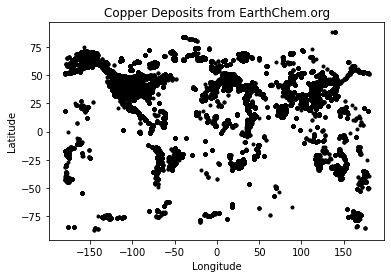

In [15]:
plt.plot(cudata4[:,1],cudata4[:,0],'k.')
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()


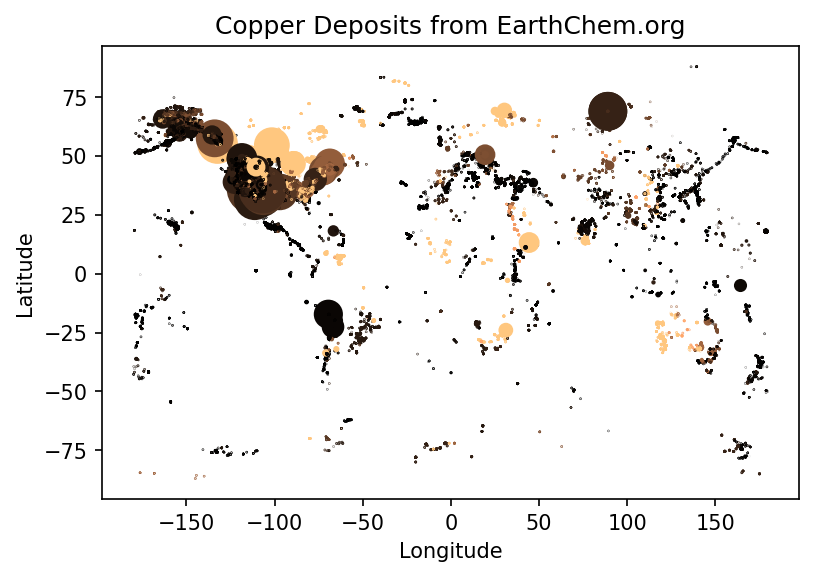

In [16]:
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,3]
copper=cudata4[:,2]

#lats_rich=lats[copper>2]

fig = plt.figure(figsize=(6,4),dpi=150)

plt.scatter(longs,lats,s=age/1000,c=copper,vmin=0, vmax=1000,cmap=plt.cm.copper)
plt.title('Copper Deposits from EarthChem.org')
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

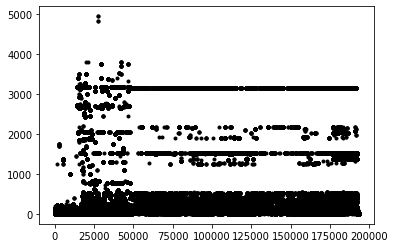

In [25]:
plt.plot(copper[copper>1],'k.')
plt.show()

In [1]:
#Import another module called Cartopy - great for plotting things on globes
import cartopy.crs as ccrs

#Make new variables from our array (so it is easier to see what we are doing)
lats=cudata4[:,0]
longs=cudata4[:,1]
age=cudata4[:,3]

#######
## Make the figure
#######

#Create a figure object
fig = plt.figure(figsize=(16,12),dpi=150)

#Make a map projection to plot on.
ax = plt.axes(projection=ccrs.Robinson())

#Add some Earth-specific details (from the cartopy package)
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
#ax.stock_img()
#ax.gridlines()

#Make a scatter plot of the data coloured by age. 
#Restrict the colour range between 0 and 2000
#And also set the scatter plot as a variable 'mapscat' so we can reference it later
mapscat=ax.scatter(longs,lats,marker=".",c=age,vmin=0,vmax=100,transform=ccrs.Geodetic(),zorder=4,cmap=plt.cm.copper)

#Make a Colorbar
cbar=plt.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Age (Ma)')

# Add a map title, and tell the figure to appear on screen
plt.title('Age of Copper Deposits in the EarthChem.org database')
plt.show()


NameError: ignored